In [1]:
import cv2
import numpy as np


In [2]:
# Basics in MNIST data
# Upload it from Keras
# Contains hand written values from 0-9
# 4 dimensions arrays (samples,x,y,channels)


In [3]:
############################################################################
############################################################################

#################        CONVOLUTIONAL NEURAL NETWORKS      ################

############################################################################

In [4]:
# Yann lecun research paper

# Tensors (n-dimension arrays)
# DNN vs CNN
# Convolutions and Filters
# Padding
# Pooling Layers
# Review Dropout
#

In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [7]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
single_image = x_train[0]

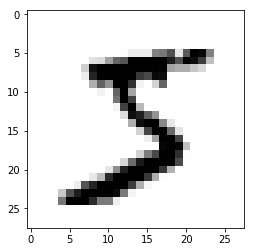

In [11]:
plt.imshow(single_image,cmap='gray_r')

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train.shape

(60000,)

In [14]:
# Convert to one hot-encoding
from keras.utils.np_utils import to_categorical

In [15]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [16]:
# Converted to one hot-encoding.
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
single_image.max()

255

In [19]:
x_train = x_train/x_train.max()

In [20]:
x_test = x_test/x_test.max()

In [21]:
scaled_img = x_train[0]

In [22]:
scaled_img.max()

1.0

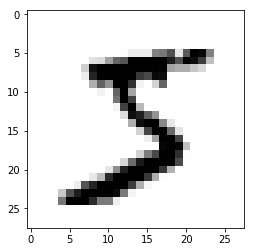

In [23]:
plt.imshow(scaled_img,cmap='gray_r')

In [24]:
# since in gray there's only one color channel.
x_train.shape

(60000, 28, 28)

In [25]:
# Add more color channels
x_train = x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [27]:
# Let's build teh model now
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [28]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#Dense Layer
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train,y_cat_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1328 - acc: 0.9608
Epoch 2/5
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0490 - acc: 0.9851
Epoch 3/5
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0362 - acc: 0.9895
Epoch 4/5
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0275 - acc: 0.9921
Epoch 5/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0223 - acc: 0.9937


In [31]:
model.metrics_names

['loss', 'acc']

In [32]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 18s 2ms/step


[0.0397927197489822, 0.9887]

In [33]:
from sklearn.metrics import classification_report

In [34]:
prediction = model.predict_classes(x_test)

In [35]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [52]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
print(classification_report(prediction,y_test))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       988
          1       1.00      0.99      0.99      1147
          2       0.98      1.00      0.99      1018
          3       0.99      0.99      0.99      1010
          4       0.98      0.99      0.99       969
          5       0.99      0.99      0.99       888
          6       0.99      0.99      0.99       959
          7       0.98      0.99      0.99      1017
          8       0.99      0.99      0.99       974
          9       0.99      0.97      0.98      1030

avg / total       0.99      0.99      0.99     10000



In [54]:
##########################################################################

##########################################################################

################          WORKING WITH COLOR IMAGES        ###############

##########################################################################

In [55]:
# CIFAR-10 DATASET (KERAS)

In [38]:
from keras.datasets import cifar10

In [39]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [40]:
x_train.shape

(50000, 32, 32, 3)

In [41]:
x_train[0].shape

(32, 32, 3)

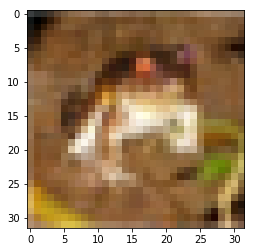

In [42]:
plt.imshow(x_train[0])

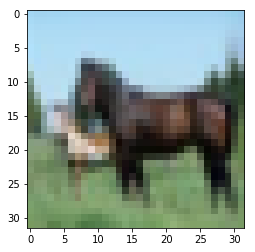

In [43]:
plt.imshow(x_train[12])

In [44]:
x_train.max()

255

In [45]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [46]:
# Convert to one hot-encoding
from keras.utils import to_categorical

In [47]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [48]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [49]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])


In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total para

model.fit(x_train,y_cat_train,verbose=1,epochs=10)

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test,y_cat_test)
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)

print(classification_report(y_test,prediction))